In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore', category=Warning)


In [ ]:
import os

# Specify the folder path
folder_path = "/content/drive/MyDrive/data/"

# Error handling: Check if folder exists
if not os.path.exists(folder_path):
    raise ValueError(f"Folder '{folder_path}' does not exist. Please provide a valid path.")

# Create an empty list to store the files
trials = []

# Iterate through files in the folder using os.listdir()
for filename in os.listdir(folder_path):
    # Check if it's a file (not a directory) using os.path.isfile()
    if os.path.isfile(os.path.join(folder_path, filename)):
        # Construct the full path to the file
        full_path = os.path.join(folder_path, filename)

        data = pd.read_csv(full_path, header=None)

        # Process the data
        print(f"Processing file: {filename}")
        trials.append(data)

Processing file: ss_0_1.csv
Processing file: ss_0_2.csv
Processing file: ss_0_3.csv
Processing file: ss_0_4.csv
Processing file: ss_0_5.csv
Processing file: ss_0_6.csv
Processing file: ss_0_7.csv
Processing file: ss_0_8.csv
Processing file: ss_0_9.csv
Processing file: ss_0_10.csv
Processing file: ss_0_11.csv
Processing file: ss_0_12.csv
Processing file: ss_0_13.csv
Processing file: ss_1_1.csv
Processing file: ss_0_15.csv
Processing file: ss_0_14.csv
Processing file: ss_1_2.csv
Processing file: ss_1_3.csv
Processing file: ss_1_4.csv
Processing file: ss_1_5.csv
Processing file: ss_1_6.csv
Processing file: ss_1_8.csv
Processing file: ss_1_7.csv
Processing file: ss_1_9.csv
Processing file: ss_1_10.csv
Processing file: ss_1_11.csv
Processing file: ss_1_12.csv
Processing file: ss_1_13.csv
Processing file: ss_2_4.csv
Processing file: ss_2_1.csv
Processing file: ss_2_5.csv
Processing file: ss_1_15.csv
Processing file: ss_1_14.csv
Processing file: ss_2_2.csv
Processing file: ss_2_6.csv
Processi

In [ ]:
#Zero pooling Applied
import numpy as np


max_samples = max(trial.shape[1] for trial in trials)

sample = np.zeros((len(trials), 62, max_samples))

for i, trial in enumerate(trials):
  padding_length = max_samples - trial.shape[1]
  sample[i, :, :] = np.pad(trial, ((0, 0), (0, padding_length)), mode='constant', constant_values=0)

print(sample.shape)


(240, 62, 59400)


In [ ]:

labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust"]*16


print(labels)


['Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad'

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(sample, labels, test_size=.2, random_state=42)

# KFold cross-validation loop
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []  # To store evaluation metrics (e.g., accuracy)

for train_index, val_index in kfold.split(X_train):
  # Split the training data further for train and validation sets within each fold
  X_train_fold = [X_train[i] for i in train_index]
  X_val_fold = [X_train[i] for i in val_index]
  y_train_fold = [y_train[i] for i in train_index]
  y_val_fold = [y_train[i] for i in val_index]


X_train_fold = np.array(X_train_fold)
X_val_fold = np.array(X_val_fold)
y_train_fold = np.array(y_train_fold)
y_val_fold = np.array(y_val_fold)


In [ ]:
#Scaling
scaler = StandardScaler()
for x in X_train_fold:
  scaler.fit(x[:, 1:])

X_train_fold_scaled = []
for x in X_train_fold:
  X_train_fold_scaled.append(scaler.transform(x[:, 1:]))
X_train_fold_scaled = np.array(X_train_fold_scaled)

X_te = []
for x in X_test:
  X_te.append(scaler.transform(x[:, 1:]))
x_test = np.array(X_te)

X_val = []
for x in X_val_fold:
  X_val.append(scaler.transform(x[:, 1:]))
X_val_fold = np.array(X_val)





In [ ]:
print(X_train_fold_scaled.shape)
print(X_val_fold.shape)
print(x_test.shape)

(154, 62, 59399)
(38, 62, 59399)
(48, 62, 59399)


In [ ]:
#One Hot Encoding
encoder = OneHotEncoder(sparse=False)
encoder.fit(np.array(y_train_fold).reshape(-1, 1))
y_train_fold_encoded = encoder.transform(np.array(y_train_fold).reshape(-1, 1))
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))
y_val_fold = encoder.transform(np.array(y_val_fold).reshape(-1, 1))

In [ ]:
print(y_train_fold_encoded.shape)
print(y_test.shape)
print(y_val_fold.shape)

(154, 5)
(48, 5)
(38, 5)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size = 3, strides=(4,4), activation = tf.nn.relu, input_shape = (x_train.shape[1], x_train.shape[2], 1)),

    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(5, activation = tf.nn.softmax)
])


In [ ]:
optimizer = optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 14850, 64)     640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7425, 64)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 7, 7425, 64)       256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 7, 7425, 64)       0         
                                                                 
 flatten (Flatten)           (None, 3326400)           0         
                                                                 
 dense (Dense)               (None, 5)                 1

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True, to_file='model.png')

Model uses 25% data for validation and 75% for training

In [ ]:
checkpoint = callbacks.ModelCheckpoint('CNN_padmodel_detect_emotional.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
csv_logger = callbacks.CSVLogger('training.log')
callbacks_list = [checkpoint, reduce_lr, csv_logger, early_stopping]

In [ ]:
#Zero Padding Model
history =   model.fit(X_train_fold_scaled, y_train_fold_encoded, epochs=100, validation_data=(X_val_fold, y_val_fold), callbacks = callbacks_list).history

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 494.1895 - acc: 0.3701 - recall: 0.3636 - auc: 0.6350 - precision: 0.3944
Epoch 1: val_loss improved from inf to 137.50294, saving model to RNN_padmodel_detect_emotional.h5
5/5 [==============================] - 15s 3s/step - loss: 494.1895 - acc: 0.3701 - recall: 0.3636 - auc: 0.6350 - precision: 0.3944 - val_loss: 137.5029 - val_acc: 0.5526 - val_recall: 0.5526 - val_auc: 0.7175 - val_precision: 0.5526 - lr: 0.0010
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 199.2426 - acc: 0.7143 - recall: 0.7143 - auc: 0.8245 - precision: 0.7143
Epoch 2: val_loss improved from 137.50294 to 75.83505, saving model to RNN_padmodel_detect_emotional.h5
5/5 [==============================] - 13s 3s/step - loss: 199.2426 - acc: 0.7143 - recall: 0.7143 - auc: 0.8245 - precision: 0.7143 - val_loss: 75.8351 - val_acc: 0.5263 - val_recall: 0.5263 - val_auc: 0.7039 - val_precision: 0.5263 - lr: 0.0010
Epoch 3/100
5/5 [===

In [ ]:
  loss, fold_accuracy,a,a2,a1 = model.evaluate(X_val_fold, y_val_fold)
  cvscores.append(fold_accuracy)

# Print the average accuracy across all folds
print(f"K-Fold Cross-Validation Accuracy: {np.mean(cvscores)}")

1/1 [==============================] - 1s 919ms/step - loss: 12.3989 - acc: 0.6842 - recall: 0.6842 - auc: 0.8837 - precision: 0.6842
K-Fold Cross-Validation Accuracy: 0.6842105388641357


In [ ]:
loss,acc,rec,auc,pre=model.evaluate(x_test, y_test)


2/2 [==============================] - 1s 365ms/step - loss: 37.1076 - acc: 0.6458 - recall: 0.6458 - auc: 0.7906 - precision: 0.6458


In [ ]:
#Zero Padding classification report

from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, output_dict=True)  # Convert one-hot labels to class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

# Access specific metrics
precision = report['accuracy']  # Overall accuracy
recall = report['weighted avg']['recall']  # Average recall
f1_score = report['weighted avg']['f1-score']  # Average F1-score

# Print specific metrics
print(f"Overall Accuracy: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {f1_score}")

2/2 [==============================] - 1s 305ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.69      0.90      0.78        10
           2       0.50      0.77      0.61        13
           3       1.00      0.12      0.22         8
           4       0.60      0.33      0.43         9

    accuracy                           0.65        48
   macro avg       0.74      0.63      0.60        48
weighted avg       0.71      0.65      0.60        48

Overall Accuracy: 0.6458333333333334
Average Recall: 0.6458333333333334
Average F1-Score: 0.6014418173945029


In [ ]:
#Zero Padding metrics

print("accuracy:",acc)
print("precision:",pre)
print("recall:",rec)
print("Area under Curve:",auc)
f1 = 2*(pre*rec)/(pre+rec)

print("f1 score:",f1)


accuracy: 0.6458333134651184
precision: 0.6458333134651184
recall: 0.6458333134651184
Area under Curve: 0.790635883808136
f1 score: 0.6458333134651184


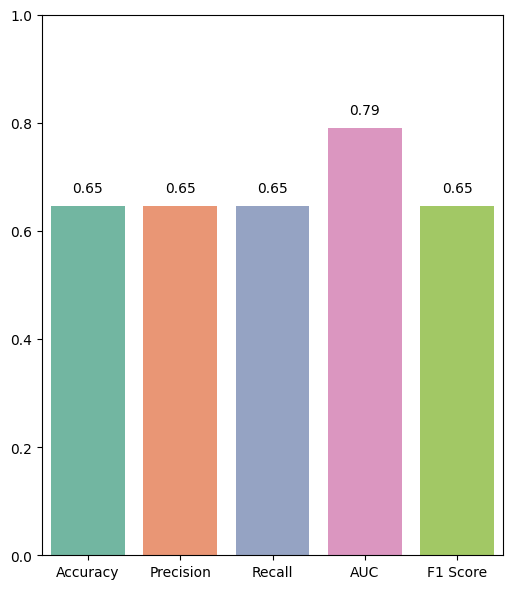

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics and models
models = ['Accuracy','Precision','Recall','AUC','F1 Score']

accuracy_values = [acc,pre,rec,auc,f1]


# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy_values, palette='Set2')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1

# Add text labels for accuracy values
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')



plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

2/2 [==============================] - 1s 311ms/step


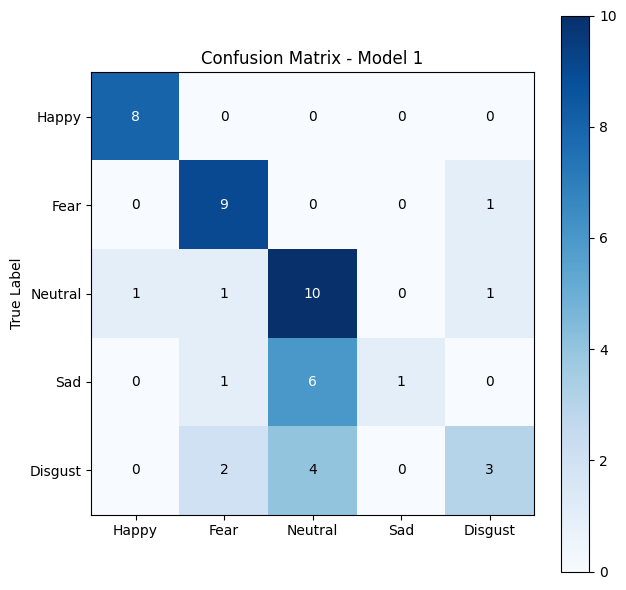

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels, title):

  labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust"]

  plt.figure(figsize=(12, 6))  # Adjust figure size as needed

  # Plot confusion matrix for model 1 on the left
  plt.subplot(1, 2, 1)
  plt.imshow(cm1, interpolation='nearest', cmap='Blues')
  plt.title("Confusion Matrix - Model 1")
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)

  # Normalize confusion matrix values to display percentages instead of raw counts

  thresh = cm1.max() / 2.
  for i in range(len(cm1)):
    for j in range(len(cm1[0])):
      plt.text(j, i, format(cm1[i, j]),  # Display percentages with 2 decimal places
               ha="center", va="center",
               color="white" if cm1[i, j] > thresh else "black")

  # Plot confusion matrix for model 2 on the right

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.show()

# Calculate confusion matrices
y_pred1 = model.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
cm1 = confusion_matrix(y_test.argmax(axis=1), y_pred_classes1)

# Create the side-by-side confusion matrix plot
plot_confusion_matrix(cm1, list(set(y_test.argmax(axis=1))),"Confusion Matrix - Model 1")